Probability that tomorrow is clear: 0.8274
Probability that tomorrow is cloudy: 0.1726


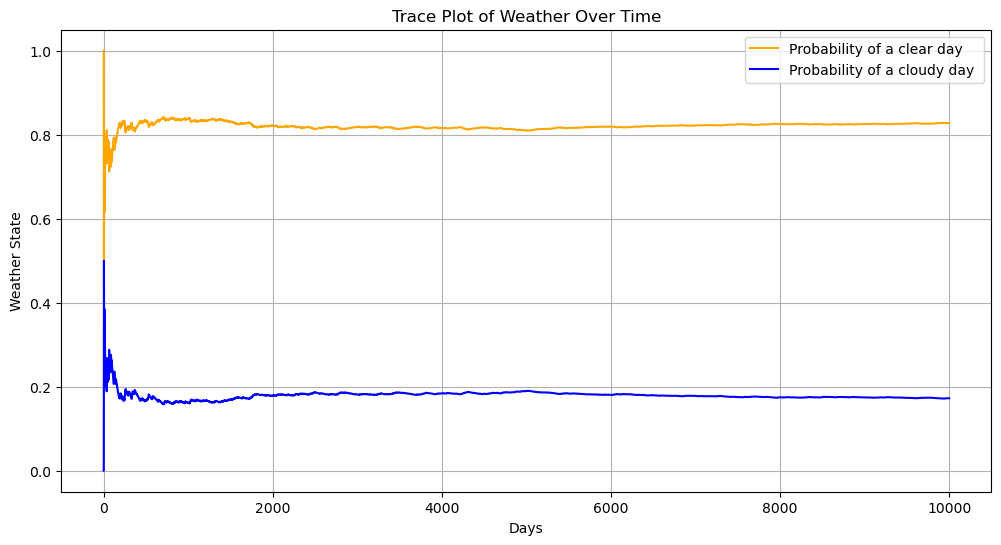

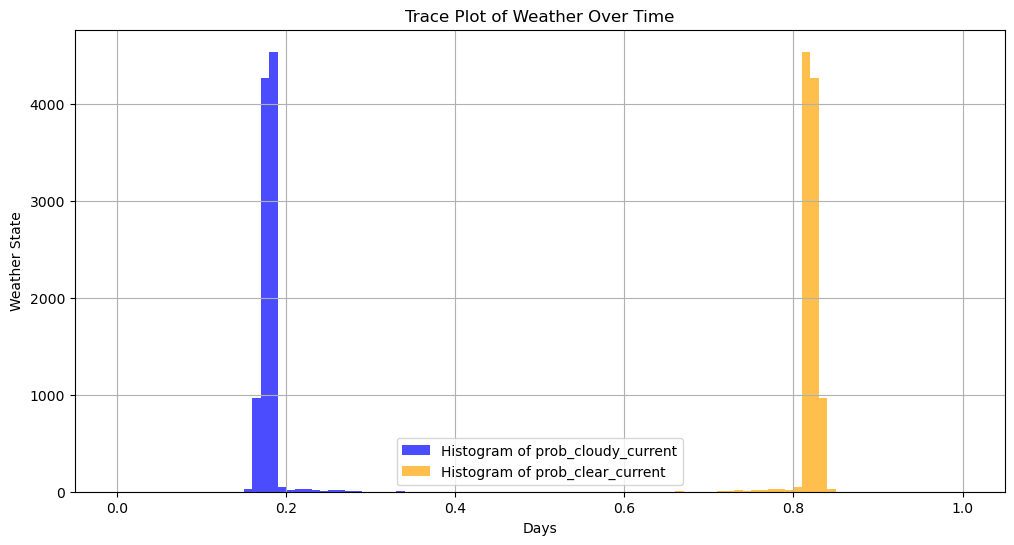

Median of prob_clear_current: 0.8208146232472481 +- 0.00632598766760137
Median of prob_cloudy_current: 0.17918537675275187 +- 0.0063259876676014315


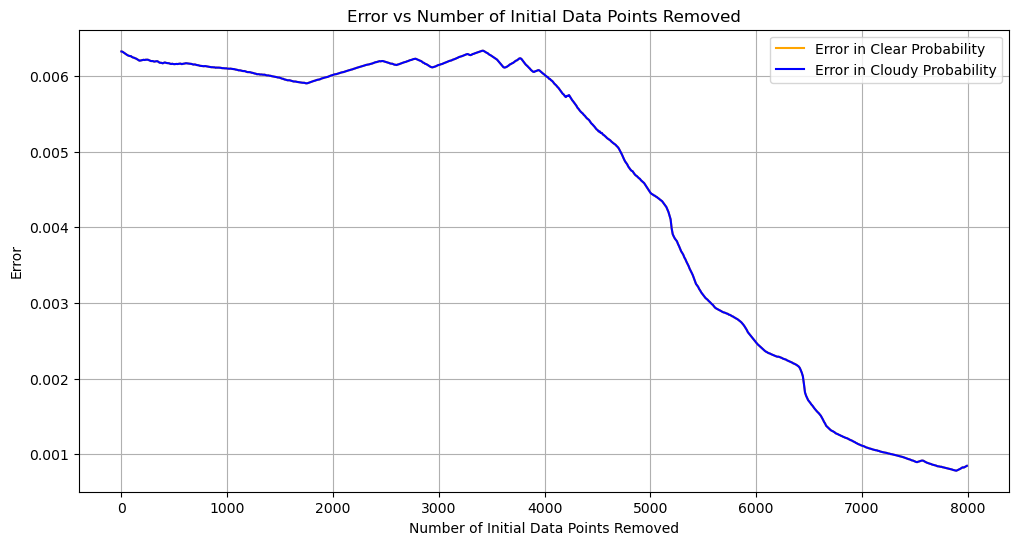

In [5]:
# Cloudy = 0
# Clear = 1

import numpy as np
import matplotlib.pyplot as plt
import astroML.stats


weather_current = 1
weather_vector = np.array([])
prob_clear_current = np.array([])
prob_cloudy_current = np.array([])

prob_tomorrow_cloudy_if_today_cloudy = 0.5
prob_tomorrow_clear_if_today_cloudy = 0.5
prob_tomorrow_cloudy_if_today_clear = 0.1
prob_tomorrow_clear_if_today_clear = 0.9

for i in range(10000):
    random = np.random.uniform(0, 1)
    if weather_current == 0:
        if random < prob_tomorrow_clear_if_today_cloudy:
            weather_vector = np.append(weather_vector, 1)
            weather_current = 1
        else:
            weather_vector = np.append(weather_vector, 0)
            weather_current = 0
        
    else:
        if random < prob_tomorrow_cloudy_if_today_clear:
            weather_vector = np.append(weather_vector, 0)
            weather_current = 0
        else:
            weather_vector = np.append(weather_vector, 1)
            weather_current = 1
    
    prob_clear_current = np.append( prob_clear_current, np.sum(weather_vector == 1) / len(weather_vector) )
    prob_cloudy_current = np.append( prob_cloudy_current, np.sum(weather_vector == 0) / len(weather_vector) )
            
prob_clear = np.sum(weather_vector == 1) / len(weather_vector)
prob_cloudy = np.sum(weather_vector == 0) / len(weather_vector)
print("Probability that tomorrow is clear:", prob_clear)
print("Probability that tomorrow is cloudy:", prob_cloudy)


plt.figure(figsize=(12, 6))
plt.plot(prob_clear_current, label="Probability of a clear day ", alpha=1, color='orange')
plt.plot(prob_cloudy_current, label="Probability of a cloudy day ", alpha=1, color='blue')
plt.title("Trace Plot of Weather Over Time")
plt.xlabel("Days")
plt.ylabel("Weather State")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(prob_cloudy_current, bins=50, color='blue', alpha=0.7, label="Histogram of prob_cloudy_current")
plt.hist(prob_clear_current, bins=50, color='orange', alpha=0.7, label="Histogram of prob_clear_current")
plt.title("Trace Plot of Weather Over Time")
plt.xlabel("Days")
plt.ylabel("Weather State")
plt.legend()
plt.grid(True)
plt.show()

print(f"Median of prob_clear_current: {np.median(prob_clear_current)} +- {astroML.stats.sigmaG(prob_clear_current)}")
print(f"Median of prob_cloudy_current: {np.median(prob_cloudy_current)} +- {astroML.stats.sigmaG(prob_cloudy_current)}")

errors = []

for cut in range(1, 8000, 10):  # Cut increasing number of initial data points
    prob_clear_trimmed = prob_clear_current[cut:]
    prob_cloudy_trimmed = prob_cloudy_current[cut:]
    
    error_clear = astroML.stats.sigmaG(prob_clear_trimmed)
    error_cloudy = astroML.stats.sigmaG(prob_cloudy_trimmed)
    
    errors.append((cut, error_clear, error_cloudy))

errors = np.array(errors)

plt.figure(figsize=(12, 6))
plt.plot(errors[:, 0], errors[:, 1], label="Error in Clear Probability", color='orange')
plt.plot(errors[:, 0], errors[:, 2], label="Error in Cloudy Probability", color='blue')
plt.title("Error vs Number of Initial Data Points Removed")
plt.xlabel("Number of Initial Data Points Removed")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()